In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from tensorflow import keras
from keras import optimizers
from keras import losses
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from sklearn.preprocessing import StandardScaler

%matplotlib inline

print('Libraries imported.')

Using TensorFlow backend.


Libraries imported.


In [0]:
import matplotlib.pyplot as plt

column_names = ['input_1', 'input_2', 'input_3', 'root','Initial_value']

def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), (h['val_loss']), label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

def plot_accuracy(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    v=[]
    for x in h['val_loss']:
        v.append((1-x)*100)
    plt.plot(range(x_lim), (v), label = 'Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    return

def plot_predictions(preds, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds, y_test, 'ro')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    plt.xlim([-0.5, 0.5])
    plt.ylim([-0.5, 0.5])
    plt.plot([-0.5, 0.5], [-0.5, 0.5], 'b--')
    plt.show()
    return

def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

In [3]:
df = pd.read_csv('NR.csv', names = column_names) 
df.head()

,input_1,input_2,input_3,root,Initial_value
0,7.444832,16.437393,-18.314700,-3.021954,-3.449212
1,8.711237,-13.262038,-32.008103,-1.301266,-2.123668
2,-5.836047,-1.010973,16.765573,1.610519,9.896467
3,2.945051,13.090892,-5.789253,0.405283,1.164366
4,7.396679,-23.788364,-49.452191,4.652963,9.542230


In [4]:
df.isna().sum()
df.isnull().any()

input_1          False
input_2          False
input_3          False
root             False
Initial_value    False
dtype: bool

In [5]:
#df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,input_1,input_2,input_3,root,Initial_value
0,1.371263,0.876604,-0.674352,-0.890468,-0.598740
1,1.603823,-0.715812,-1.177373,-0.383152,-0.369616
2,-1.067601,-0.058938,0.614306,0.475338,1.708100
3,0.544936,0.697172,-0.214235,0.119995,0.198731
4,1.362421,-1.280210,-1.818173,1.372351,1.646869


In [0]:
y_mean = df['root'].mean()
y_std = df['root'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)


In [7]:
X = df_norm.iloc[:, :3]
X.head()

,input_1,input_2,input_3
0,1.371263,0.876604,-0.674352
1,1.603823,-0.715812,-1.177373
2,-1.067601,-0.058938,0.614306
3,0.544936,0.697172,-0.214235
4,1.362421,-1.280210,-1.818173


In [8]:
Y = df_norm.iloc[:, -2]
Y.head()

0   -0.890468
1   -0.383152
2    0.475338
3    0.119995
4    1.372351
Name: root, dtype: float64

In [9]:
X_arr = X.values
Y_arr = Y.values

print('X_arr shape: ', X_arr.shape)
print('Y_arr shape: ', Y_arr.shape)

X_arr shape:  (105472, 3)
Y_arr shape:  (105472,)


In [10]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_arr, Y_arr, test_size = 0.029126, shuffle = True, random_state=0)

print('X_train shape: ', X_train_full.shape)
print('y_train shape: ', y_train_full.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (102400, 3)
y_train shape:  (102400,)
X_test shape:  (3072, 3)
y_test shape:  (3072,)


In [11]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=0)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_valid shape: ', X_valid.shape)
print('y_valid shape: ', y_valid.shape)

X_train shape:  (76800, 3)
y_train shape:  (76800,)
X_valid shape:  (25600, 3)
y_valid shape:  (25600,)


In [12]:
np.random.seed(0)
tf.random.set_seed(0)
def get_model():
    model = Sequential([
        Dense(8, input_shape = (3,), activation = 'relu'),
        Dense(5,  activation = 'relu'),
        Dense(3,  activation = 'relu'),
        Dense(1)
    ])
    model.compile(
        loss='mse',
        optimizer='sgd'
    )
    
    return model

model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


In [13]:
early_stopping = EarlyStopping(monitor='loss', patience = 1000,restore_best_weights=True)
checkpoint_cb=keras.callbacks.ModelCheckpoint("Best_model.h5",save_best_only=True)
model = get_model()

preds_on_untrained = model.predict(X_test)
start_time=time.time()
history = model.fit(
    X_train, y_train,validation_data=(X_valid,y_valid),
    epochs = 5000,batch_size=3200,
    callbacks = [early_stopping,checkpoint_cb]
)
end_time=time.time()
print("Total time taken to train:",end_time-start_time)

Streaming output truncated to the last 5000 lines.
Epoch 2502/5000
24/24 [==============================] - 0s 3ms/step - loss: 0.8017 - val_loss: 0.7892
Epoch 2503/5000
24/24 [==============================] - 0s 3ms/step - loss: 0.8015 - val_loss: 0.7891
Epoch 2504/5000
24/24 [==============================] - 0s 3ms/step - loss: 0.8014 - val_loss: 0.7891
Epoch 2505/5000
24/24 [==============================] - 0s 3ms/step - loss: 0.8016 - val_loss: 0.7890
Epoch 2506/5000
24/24 [==============================] - 0s 3ms/step - loss: 0.8016 - val_loss: 0.7889
Epoch 2507/5000
24/24 [==============================] - 0s 3ms/step - loss: 0.8015 - val_loss: 0.7891
Epoch 2508/5000
24/24 [==============================] - 0s 3ms/step - loss: 0.8014 - val_loss: 0.7892
Epoch 2509/5000
24/24 [==============================] - 0s 3ms/step - loss: 0.8016 - val_loss: 0.7923
Epoch 2510/5000
24/24 [==============================] - 0s 3ms/step - loss: 0.8016 - val_loss: 0.7890
Epoch 2511/5000
24/24 

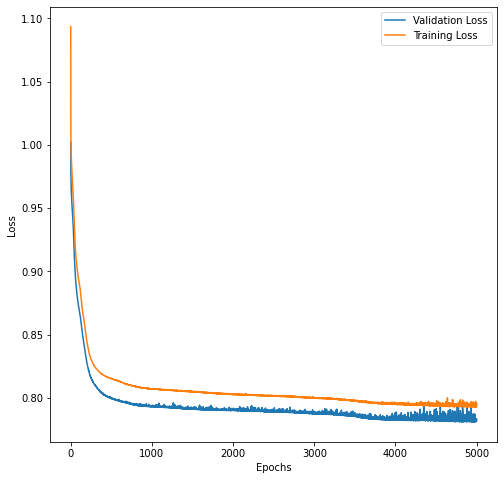

In [14]:
plot_loss(history)
#plot_accuracy(history)

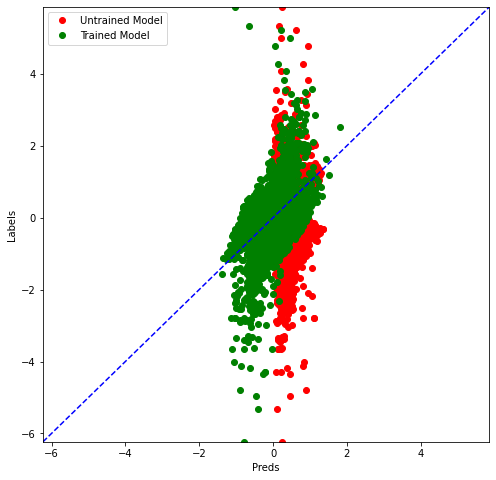

In [15]:
preds_on_trained = model.predict(X_test)

compare_predictions(preds_on_untrained, preds_on_trained, y_test)

In [16]:
model=keras.models.load_model("Best_model.h5")
start=time.time()
loss=model.evaluate(X_test,y_test)
end=time.time()
print("Time taken:",end-start)

96/96 [==============================] - 0s 1ms/step - loss: 0.7145
Time taken: 0.17937803268432617


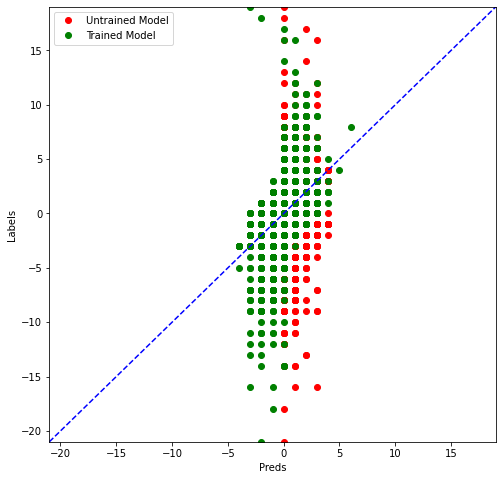

In [17]:
price_on_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_on_trained = [convert_label_value(y) for y in preds_on_trained]
price_y_test = [convert_label_value(y) for y in y_test]

compare_predictions(price_on_untrained, price_on_trained, price_y_test)